# Predicting MPG from Vehicle Features

## Introduction
I am interested in cars and want to predict miles per gallon (MPG) based on various vehicle features.

**Dataset Summary:**
https://www.kaggle.com/datasets/uciml/autompg-dataset
- **Rows:** 392
- **Columns:** 9
  - `mpg`: continuous (target)
  - `cylinders`: multi-valued discrete
  - `displacement`: continuous
  - `horsepower`: continuous
  - `weight`: continuous
  - `acceleration`: continuous
  - `model year`: multi-valued discrete
  - `origin`: multi-valued discrete
  - `car name`: string

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("/Users/tylerweber/Downloads/auto-mpg.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [31]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

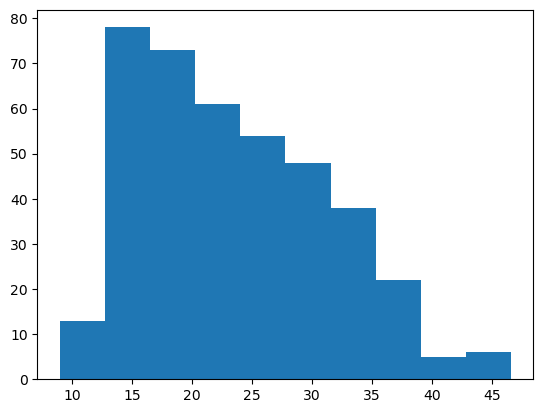

In [11]:
plt.hist(df['mpg'])

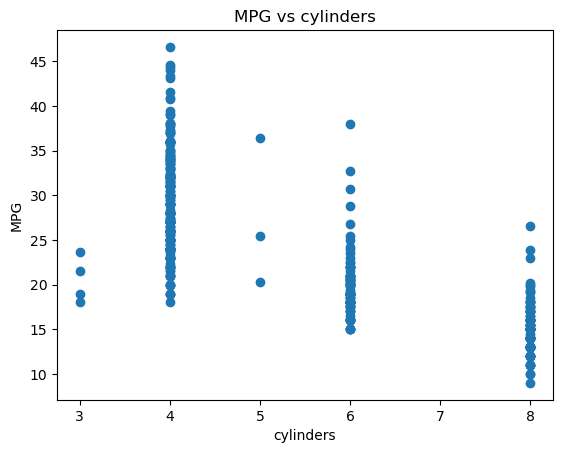

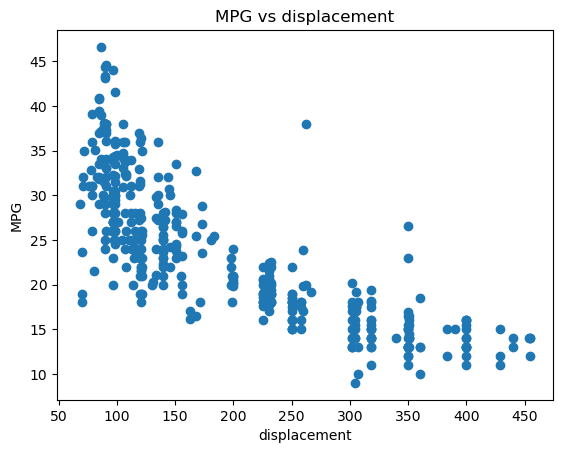

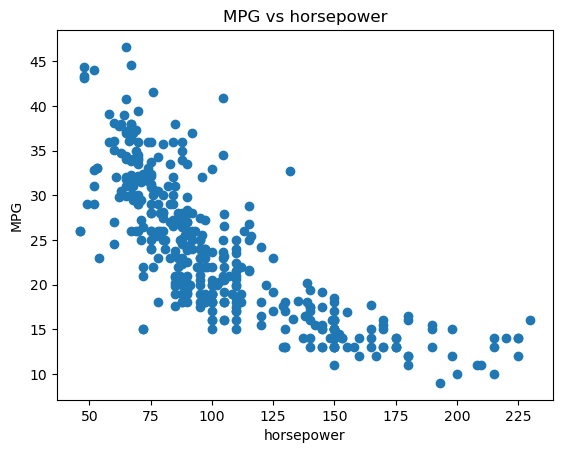

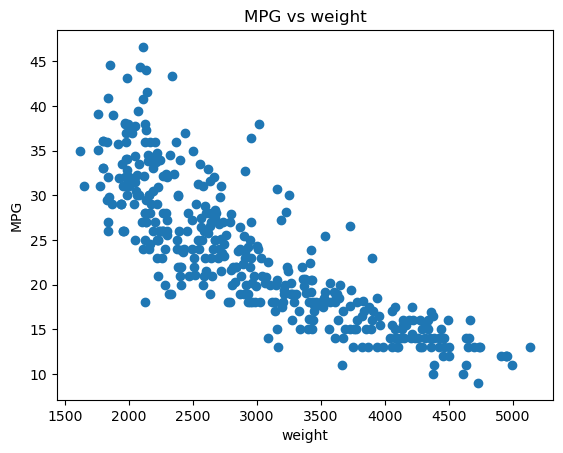

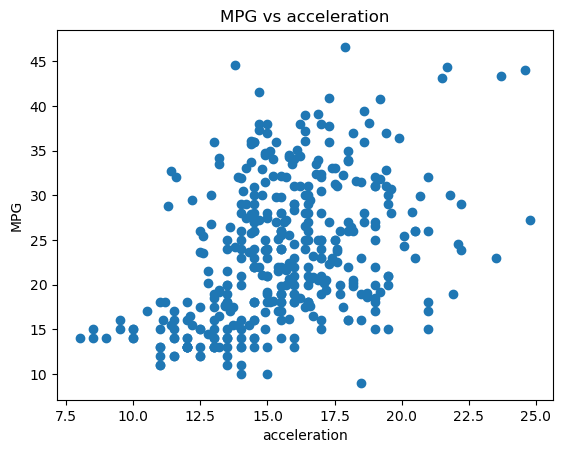

In [33]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for feature in features:
    plt.scatter(df[feature], df['mpg'])
    plt.xlabel(feature)
    plt.ylabel('MPG')`
    plt.title(f'MPG vs {feature}')
    plt.show()

## What is Regression?
Regression is a method to predict a continuous outcome based on input features.  

Linear Regression Formula:


y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon


- \(y\): predicted MPG  
- \(x_1, x_2, ... x_n\): input features (cylinders, weight, etc.)  
- \(\beta_i\): coefficient for each feature  
- \(\epsilon\): error term  

A positive \(\beta_i\) means the feature increases MPG; a negative \(\beta_i\) means it decreases MPG.

Text(0, 0.5, 'MPG')

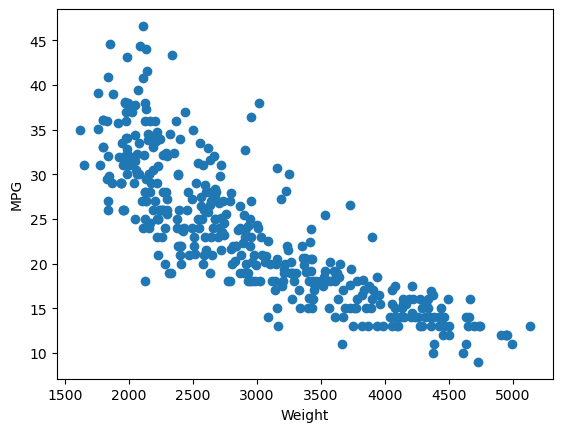

In [12]:
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')


## Experiment 1:

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [37]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [18]:
corr = df[['mpg','cylinders','displacement','horsepower','weight','acceleration']].corr()
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   

              acceleration  
mpg               0.420289  
cylinders        -0.505419  
displacement     -0.543684  
horsepower       -0.684259  
weight           -0.417457  
acceleration      1.000000  


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df[['cylinders','displacement','horsepower','weight','acceleration']]
y = df['mpg']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred1 = lr.predict(X_test)

In [46]:
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)
r21 = lr.score(X_test, y_test)

In [47]:
print(f"RMSE: {rmse1:.2f}, MAE: {mae1:.2f}, R²: {r21:.2f}")

RMSE: 3.83, MAE: 3.12, R²: 0.73


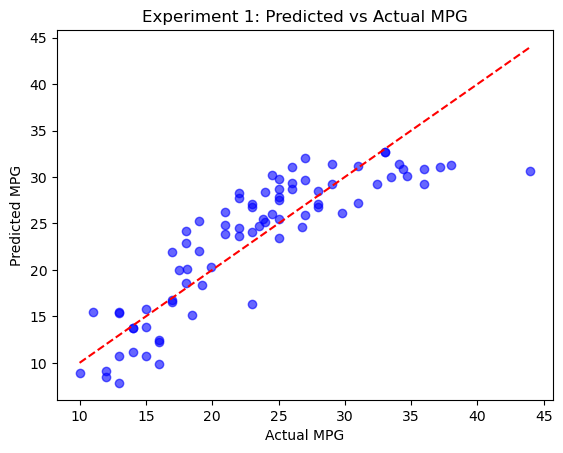

In [48]:
plt.scatter(y_test, y_pred1, color='blue', alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Experiment 1: Predicted vs Actual MPG')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Experiment 2:
- Standardize features
- Apply Ridge with alpha=10 for noticeable coefficient shrinkage

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
ridge = Ridge(alpha=10.0)
ridge.fit(X_train_scaled, y_train)
y_pred2 = ridge.predict(X_test_scaled)

In [52]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = ridge.score(X_test_scaled, y_test)

In [53]:
print(f"RMSE: {rmse2:.2f}, MAE: {mae2:.2f}, R²: {r22:.2f}")

RMSE: 3.83, MAE: 3.10, R²: 0.73


        Feature  Linear Coef  Ridge Coef
0     cylinders    -0.194007   -0.545645
1  displacement    -0.006376   -1.046947
2    horsepower    -0.041481   -1.616742
3        weight    -0.005221   -3.668875
4  acceleration    -0.035030   -0.179687


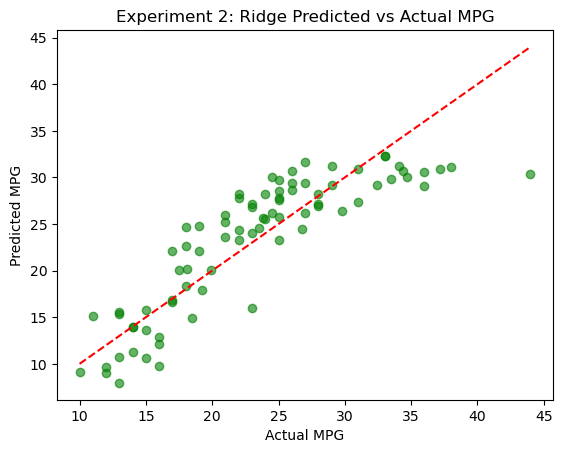

In [54]:
coef_df = pd.DataFrame({'Feature': features, 'Linear Coef': lr.coef_, 'Ridge Coef': ridge.coef_})
print(coef_df)

plt.scatter(y_test, y_pred2, color='green', alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Experiment 2: Ridge Predicted vs Actual MPG')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Experiment 3
- Use PolynomialFeatures (degree=2) to capture non-linear relationships

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [57]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred3 = lr_poly.predict(X_test_poly)

In [58]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
mae3 = mean_absolute_error(y_test, y_pred3)
r23 = lr_poly.score(X_test_poly, y_test)

In [60]:
print(f"RMSE: {rmse3:.2f}, MAE: {mae3:.2f}, R²: {r23:.2f}")


RMSE: 3.40, MAE: 2.62, R²: 0.79


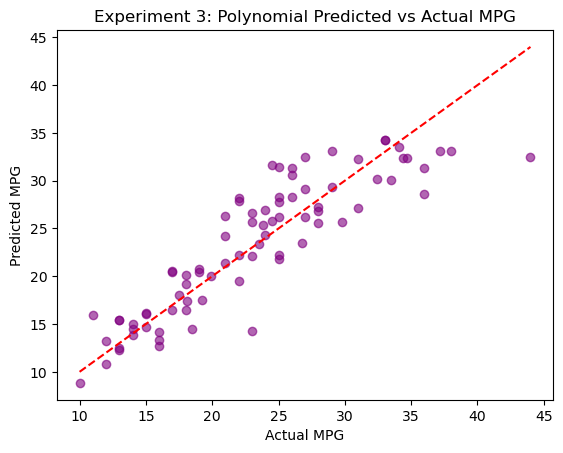

In [61]:
plt.scatter(y_test, y_pred3, color='purple', alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Experiment 3: Polynomial Predicted vs Actual MPG')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()